## Classifieur Bayésien Naïf

In [1]:
from collections import Counter
from dataset import load_dataset, preprocess
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
sns.set_theme()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juliettejacquot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliettejacquot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juliettejacquot/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Chargement du jeu de données

In [2]:
dataset = load_dataset()
dataset = preprocess(dataset)
dataset.head()

,Title,Genre,Plot
6,The Great Train Robbery,western,The film opens with two bandits breaking into ...
7,The Suburbanite,comedy,The film is about a family who move to the sub...
11,From Leadville to Aspen: A Hold-Up in the Rockies,crime,The film features a train traveling through th...
14,How Brown Saw the Baseball Game,comedy,Before heading out to a baseball game at a nea...
15,Laughing Gas,comedy,The plot is that of a black woman going to the...


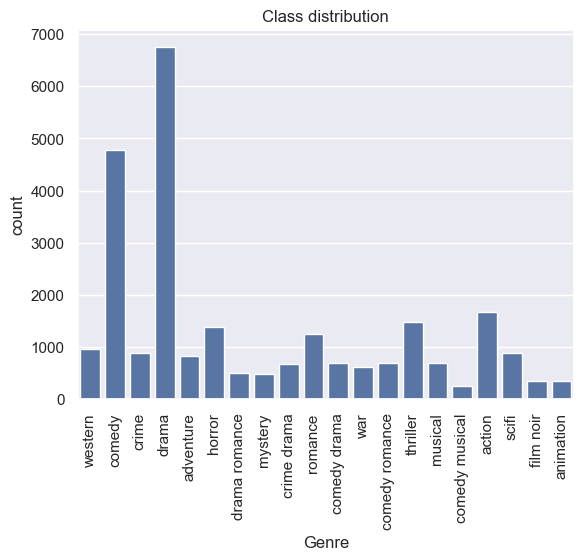

In [3]:
sns.countplot(x='Genre', data=dataset)
plt.title("Class distribution")
plt.xticks(rotation=90)
plt.show()

### Division du jeu de données

In [4]:
X, y = dataset['Plot'], dataset['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(f"Train: {len(X_train)}")
print(f"Test:  {len(X_test)}")

Train: 20931
Test:  5233


### Calcul des résultats

In [6]:
def remove_empty_str(tab):
    res = []
    for string in tab:
        if string != '':
            res.append(string)
    return res

def get_full_accuracy(y_test, y_pred):
    report = classification_report(y_test, y_pred, zero_division=np.nan)
    tab = report.split('\n')
    acc = remove_empty_str(tab[23].split(' '))
    return float(acc[1])

def get_macro_f1(y_test, y_pred):
    report = classification_report(y_test, y_pred, zero_division=np.nan)
    tab = report.split('\n')
    acc = remove_empty_str(tab[24].split(' '))
    return float(acc[4])

### Entrainement d'un modèle pré-existant

#### Sans lemme

In [7]:
model = make_pipeline(
    CountVectorizer(
        lowercase=True,
        tokenizer=word_tokenize,
        token_pattern=None,
        ngram_range = (1,1)
    ),
    MultinomialNB(
        alpha=0.1
    ),
)

In [8]:
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(token_pattern=None,
                                 tokenizer=<function word_tokenize at 0x13a314c20>)),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

In [9]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=np.nan))
print(get_macro_f1(y_test, y_pred))

                precision    recall  f1-score   support

        action       0.40      0.41      0.40       328
     adventure       0.43      0.48      0.45       152
     animation       0.67      0.43      0.52        61
        comedy       0.49      0.57      0.53       973
  comedy drama       0.15      0.05      0.07       146
comedy musical       0.22      0.04      0.06        53
comedy romance       0.21      0.10      0.14       153
         crime       0.34      0.19      0.24       188
   crime drama       0.16      0.14      0.15       125
         drama       0.52      0.52      0.52      1335
 drama romance       0.09      0.10      0.10        98
     film noir       0.24      0.12      0.16        69
        horror       0.60      0.61      0.60       284
       musical       0.30      0.20      0.24       133
       mystery       0.44      0.35      0.39        89
       romance       0.26      0.49      0.34       252
         scifi       0.63      0.69      0.66  

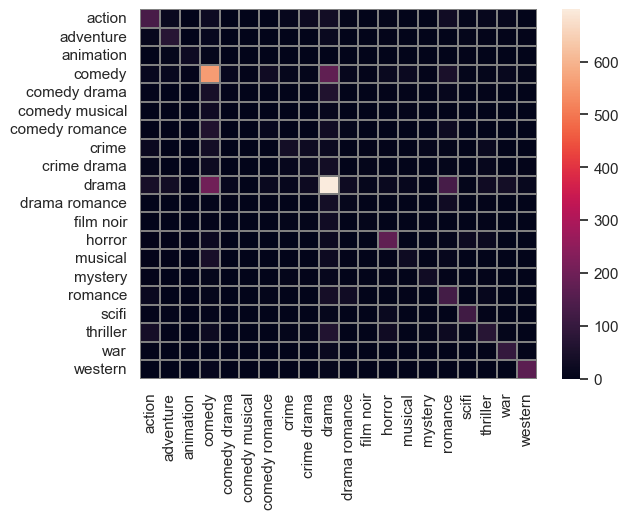

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=model.classes_, yticklabels=model.classes_, linewidths=0.005, linecolor='grey')
plt.show()

#### Avec lemme

In [11]:
def tokenize(document):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(document)
    return list(map(lemmatizer.lemmatize, words))

In [12]:
model = make_pipeline(
    CountVectorizer(
        lowercase=True,
        tokenizer=tokenize,
        token_pattern=None,
        ngram_range = (1,1)
    ),
    MultinomialNB(
        alpha=0.1
    ),
)

In [13]:
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(token_pattern=None,
                                 tokenizer=<function tokenize at 0x1686d7e20>)),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

In [14]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=np.nan))
print(get_macro_f1(y_test, y_pred))

                precision    recall  f1-score   support

        action       0.40      0.41      0.40       328
     adventure       0.45      0.49      0.47       152
     animation       0.66      0.41      0.51        61
        comedy       0.50      0.57      0.53       973
  comedy drama       0.17      0.06      0.09       146
comedy musical       0.17      0.04      0.06        53
comedy romance       0.22      0.12      0.15       153
         crime       0.32      0.20      0.24       188
   crime drama       0.16      0.16      0.16       125
         drama       0.53      0.52      0.52      1335
 drama romance       0.09      0.10      0.10        98
     film noir       0.26      0.13      0.17        69
        horror       0.59      0.61      0.60       284
       musical       0.32      0.23      0.26       133
       mystery       0.41      0.34      0.37        89
       romance       0.26      0.48      0.33       252
         scifi       0.60      0.68      0.64  

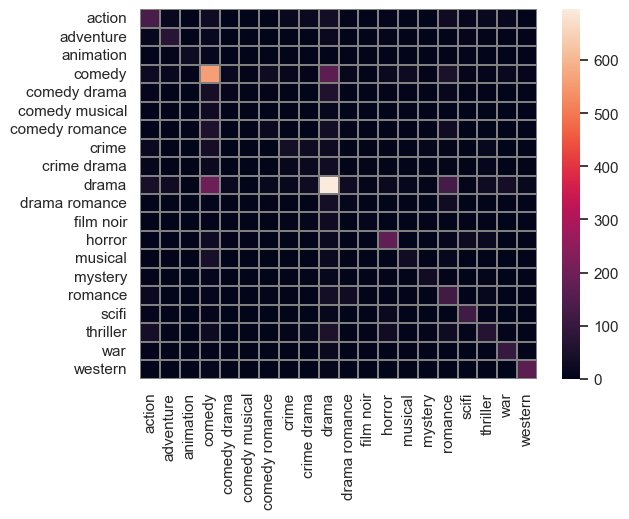

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=model.classes_, yticklabels=model.classes_, linewidths=0.005, linecolor='grey')
plt.show()

#### Ajout de stop words

In [16]:
from itertools import chain
stop_words = stopwords.words('english')
stop_words = set(chain.from_iterable(map(tokenize, stop_words)))

In [17]:
model = make_pipeline(
    CountVectorizer(
        lowercase=True,
        tokenizer=tokenize,
        stop_words=list(stop_words),
        token_pattern=None,
        ngram_range = (1,1)
    ),
    MultinomialNB(
        alpha=0.1
    ),
)

In [18]:
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words=['couldn', 'just', 'mustn', 'how',
                                             'now', 'o', 'shouldn', 'very',
                                             'yourselves', 'isn', 'is', 'ours',
                                             'while', 'under', 'myself', "'re",
                                             'can', 'them', 'between',
                                             'himself', 'wa', 'on', 's', 'shan',
                                             'once', 'had', 'didn', 'could',
                                             "'ve", 'nor', ...],
                                 token_pattern=None,
                                 tokenizer=<function tokenize at 0x1686d7e20>)),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

In [19]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=np.nan))
print(get_macro_f1(y_test, y_pred))

                precision    recall  f1-score   support

        action       0.41      0.40      0.41       328
     adventure       0.44      0.47      0.46       152
     animation       0.67      0.43      0.52        61
        comedy       0.49      0.58      0.53       973
  comedy drama       0.20      0.07      0.10       146
comedy musical       0.17      0.04      0.06        53
comedy romance       0.19      0.08      0.12       153
         crime       0.33      0.19      0.24       188
   crime drama       0.15      0.15      0.15       125
         drama       0.52      0.52      0.52      1335
 drama romance       0.10      0.11      0.10        98
     film noir       0.25      0.12      0.16        69
        horror       0.58      0.61      0.59       284
       musical       0.29      0.20      0.23       133
       mystery       0.39      0.34      0.36        89
       romance       0.25      0.48      0.33       252
         scifi       0.60      0.67      0.64  

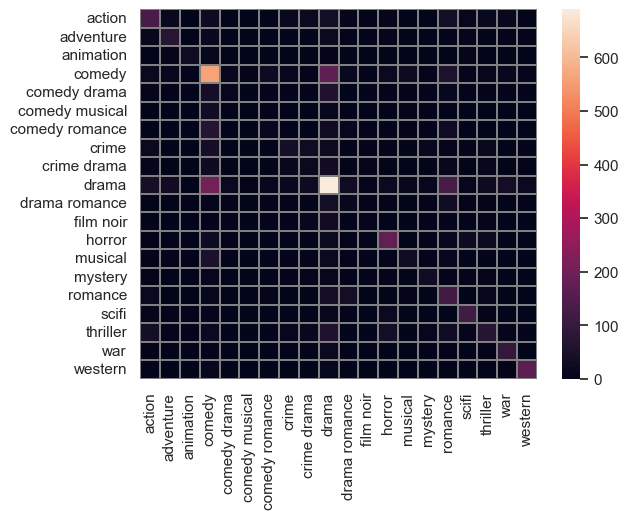

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=model.classes_, yticklabels=model.classes_, linewidths=0.005, linecolor='grey')
plt.show()

### Bayésien Naïf fait main

In [21]:
class NaiveBayesian:
    def __init__(self, tokenizer=word_tokenize, lowercase=False, k=1, lemmatize=False):
        self.tokenizer = tokenizer
        self.lowercase = lowercase
        self.k = k
        self.priors = None
        self.vocabulary = None
        self.classes = None
        self.probabilities = dict()
        self.lemmatize = lemmatize

    def fit(self, X_train, y_train):
        train_tokens_string = " ".join(X_train)
        if self.lowercase:
            train_tokens_string = train_tokens_string.lower()
        train_tokens = self.tokenizer(train_tokens_string)
        if self.lemmatize:
            train_tokens = list(map(WordNetLemmatizer().lemmatize, train_tokens))
        self.vocabulary = set(train_tokens)
        count_c = Counter(y_train)
        self.priors = {k:v/len(y_train) for k, v in count_c.items()}
        self.classes = set(y_train)
        df = pd.DataFrame(zip(X_train, y_train), columns = ["plot", "genre"])

        mega_dict = dict()
        nb_voc = len(self.vocabulary)
        for c in self.classes:
            document = " ".join(df[df.genre == c])
            tokens = self.tokenizer(document)
            mega_dict[c] = Counter(tokens)
            self.probabilities[c] = dict()
            nb_toks = len(tokens)
            for token in self.vocabulary:
                self.probabilities[c][token] = (mega_dict[c][token] + self.k) / (nb_toks + self.k * nb_voc)

    def predict_single(self, X_test_single):
        predictions = dict()
        if self.lowercase:
            X_test_single = X_test_single.lower()
        tokens = self.tokenizer(X_test_single)
        if self.lemmatize:
            tokens = list(map(WordNetLemmatizer().lemmatize, tokens))
        for c in self.classes:
            res = np.log2(self.priors[c])
            for token in tokens:
                if token in self.probabilities[c]:
                    res += np.log2(self.probabilities[c][token])
            res = 2 ** res
            predictions[c] = res
        return max(predictions, key=predictions.get)
    
    def predict(self, X_test):
        y_pred = []
        for X_test_single in X_test:
            y_pred.append(self.predict_single(X_test_single))
        return y_pred


In [22]:
model = NaiveBayesian(k=0.1)
model.fit(X_train, y_train)

In [23]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=np.nan))
print(get_macro_f1(y_test, y_pred))

                precision    recall  f1-score   support

        action        nan      0.00      0.00       328
     adventure       0.03      0.89      0.05       152
     animation        nan      0.00      0.00        61
        comedy        nan      0.00      0.00       973
  comedy drama        nan      0.00      0.00       146
comedy musical        nan      0.00      0.00        53
comedy romance        nan      0.00      0.00       153
         crime        nan      0.00      0.00       188
   crime drama        nan      0.00      0.00       125
         drama       0.27      0.09      0.14      1335
 drama romance        nan      0.00      0.00        98
     film noir        nan      0.00      0.00        69
        horror        nan      0.00      0.00       284
       musical        nan      0.00      0.00       133
       mystery        nan      0.00      0.00        89
       romance        nan      0.00      0.00       252
         scifi        nan      0.00      0.00  

In [24]:
model = NaiveBayesian(lowercase=True, k=0.1)
model.fit(X_train, y_train)

In [25]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=np.nan))
print(get_macro_f1(y_test, y_pred))

                precision    recall  f1-score   support

        action        nan      0.00      0.00       328
     adventure       0.03      0.89      0.05       152
     animation        nan      0.00      0.00        61
        comedy        nan      0.00      0.00       973
  comedy drama        nan      0.00      0.00       146
comedy musical        nan      0.00      0.00        53
comedy romance        nan      0.00      0.00       153
         crime        nan      0.00      0.00       188
   crime drama        nan      0.00      0.00       125
         drama       0.27      0.10      0.14      1335
 drama romance        nan      0.00      0.00        98
     film noir        nan      0.00      0.00        69
        horror        nan      0.00      0.00       284
       musical        nan      0.00      0.00       133
       mystery        nan      0.00      0.00        89
       romance        nan      0.00      0.00       252
         scifi        nan      0.00      0.00  

In [26]:
model = NaiveBayesian(lowercase=True, lemmatize=True, k=0.1)
model.fit(X_train, y_train)

In [27]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=np.nan))
print(get_macro_f1(y_test, y_pred))

                precision    recall  f1-score   support

        action        nan      0.00      0.00       328
     adventure       0.03      0.89      0.05       152
     animation        nan      0.00      0.00        61
        comedy        nan      0.00      0.00       973
  comedy drama        nan      0.00      0.00       146
comedy musical        nan      0.00      0.00        53
comedy romance        nan      0.00      0.00       153
         crime        nan      0.00      0.00       188
   crime drama        nan      0.00      0.00       125
         drama       0.27      0.10      0.14      1335
 drama romance        nan      0.00      0.00        98
     film noir        nan      0.00      0.00        69
        horror        nan      0.00      0.00       284
       musical        nan      0.00      0.00       133
       mystery        nan      0.00      0.00        89
       romance        nan      0.00      0.00       252
         scifi        nan      0.00      0.00  